In [1]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


# **Loading the data and storing into corresponding variables**

In [2]:
train = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
test = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')
sample = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv')


In [3]:
#Test Data,Understanding the data
print("Test:", test.shape)
print(test.info())

Test: (5000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               5000 non-null   object 
 1   Cross_Street           810 non-null    object 
 2   Latitude               5000 non-null   float64
 3   Longitude              5000 non-null   float64
 4   Date_Reported          5000 non-null   object 
 5   Date_Occurred          5000 non-null   object 
 6   Time_Occurred          5000 non-null   float64
 7   Area_ID                5000 non-null   float64
 8   Area_Name              5000 non-null   object 
 9   Reporting_District_no  5000 non-null   float64
 10  Part 1-2               5000 non-null   float64
 11  Modus_Operandi         4316 non-null   object 
 12  Victim_Age             5000 non-null   float64
 13  Victim_Sex             4357 non-null   object 
 14  Victim_Descent         4357 non-null   

In [4]:
#train data
print("Train:", train.shape)
print(train.info())
train.head()
print("Shape of training Data is",train.shape)

Train: (20000, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-nu

# **Exploratory Data Analysis**

In [5]:
train.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [6]:
train.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [7]:
test.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,1847.000000
mean,33.957169,-117.952663,1337.737400,10.736600,1119.879800,1.414000,30.592000,300.858800,364.014077
std,1.986742,6.890957,663.922202,6.051524,605.143645,0.492598,21.897905,212.253742,119.489932
min,0.000000,-118.650300,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.010800,-118.431200,900.000000,6.000000,628.000000,1.000000,14.000000,101.000000,309.000000
50%,34.058000,-118.323200,1430.000000,11.000000,1138.000000,1.000000,31.000000,203.000000,400.000000
75%,34.162250,-118.274600,1900.000000,16.000000,1622.250000,2.000000,46.000000,501.000000,400.000000
max,34.327500,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,957.000000,516.000000


From using the describe() function it is noticed that there are some 'zero' values in the latitude and longitude which were found to be outliers.Also there were negative values in the age column.

In [8]:
train.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [9]:
test.isnull().sum()

Location                    0
Cross_Street             4190
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Area_Name                   0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi            684
Victim_Age                  0
Victim_Sex                643
Victim_Descent            643
Premise_Code                0
Premise_Description         1
Weapon_Used_Code         3153
Weapon_Description       3153
Status                      0
Status_Description          0
dtype: int64

           Latitude     Longitude
count  20000.000000  20000.000000
mean      34.073591   -118.354656
std        0.113218      0.103287
min       33.707000   -118.663400
25%       34.010675   -118.429700
50%       34.059600   -118.324400
75%       34.165025   -118.275600
max       34.328100   -118.159300


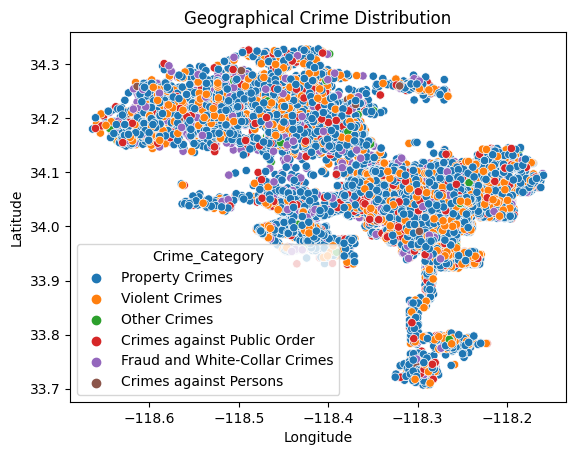

In [10]:

# Replace 0s in Latitude and Longitude with the calculated mean
mean_latitude = train[train['Latitude'] != 0]['Latitude'].mean()
mean_longitude = train[train['Longitude'] != 0]['Longitude'].mean()
train.loc[train['Latitude'] == 0, 'Latitude'] = mean_latitude
train.loc[train['Longitude'] == 0, 'Longitude'] = mean_longitude

tmean_latitude = test[test['Latitude'] != 0]['Latitude'].mean()
tmean_longitude = test[test['Longitude'] != 0]['Longitude'].mean()
test.loc[test['Latitude'] == 0, 'Latitude'] = tmean_latitude
test.loc[test['Longitude'] == 0, 'Longitude'] = tmean_longitude


print(train[['Latitude', 'Longitude']].describe())


# Scatter plot
sns.scatterplot(x='Longitude', y='Latitude', hue='Crime_Category', data=train)
plt.title('Geographical Crime Distribution')
plt.show()





> **Observation**
It is observed that crimes are spread across the area, but certain categories seem more concentrated in specific regions.Property crimes (in blue) appear widely distributed, while other categories like fraud and white-collar crimes (in purple) might be more localized towards the middle regions.

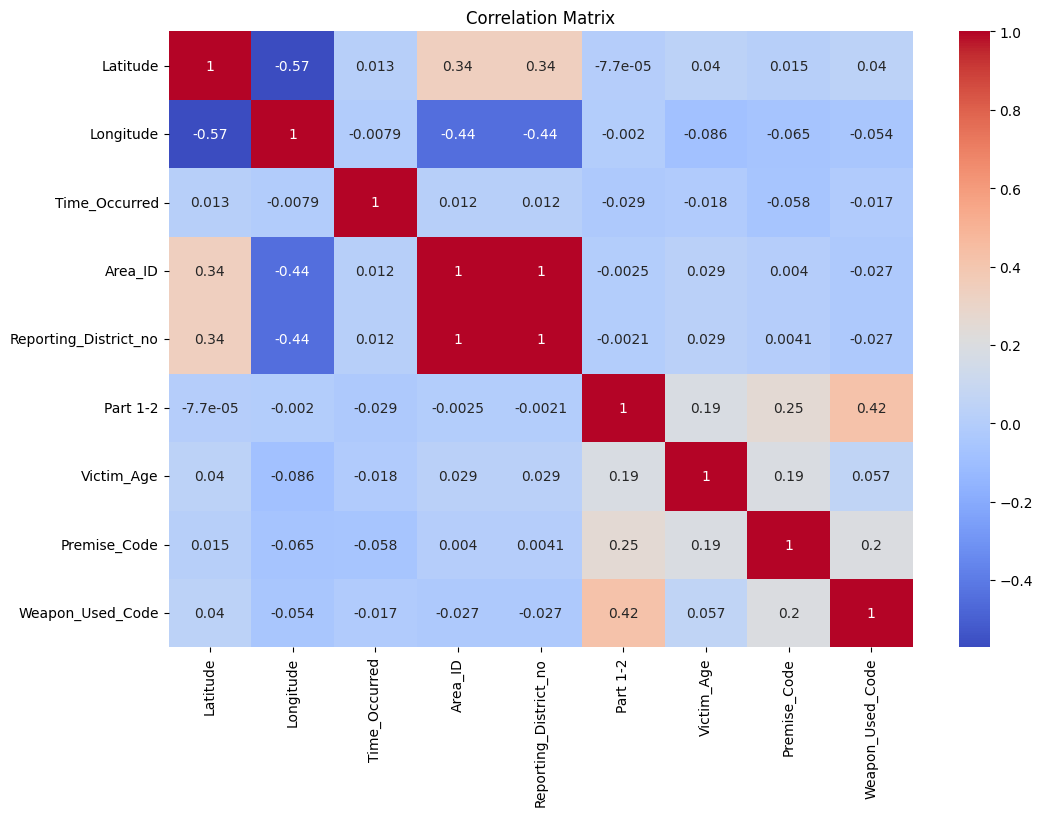

In [11]:
# Subset the DataFrame with numeric columns
numeric_columns = train.select_dtypes(include=[np.number]).columns
numeric_data = train[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

> **Observations** 
* Many of the correlations are close to 0,indicating no linear relationship between those pairs of variables.
* Part 1-2 has a decent correlation of 0.42 with Weapon_Used_Code
* Area_ID and Reporting_District_no have perfect correlation with one another and therfore one of them could be safely dropped.

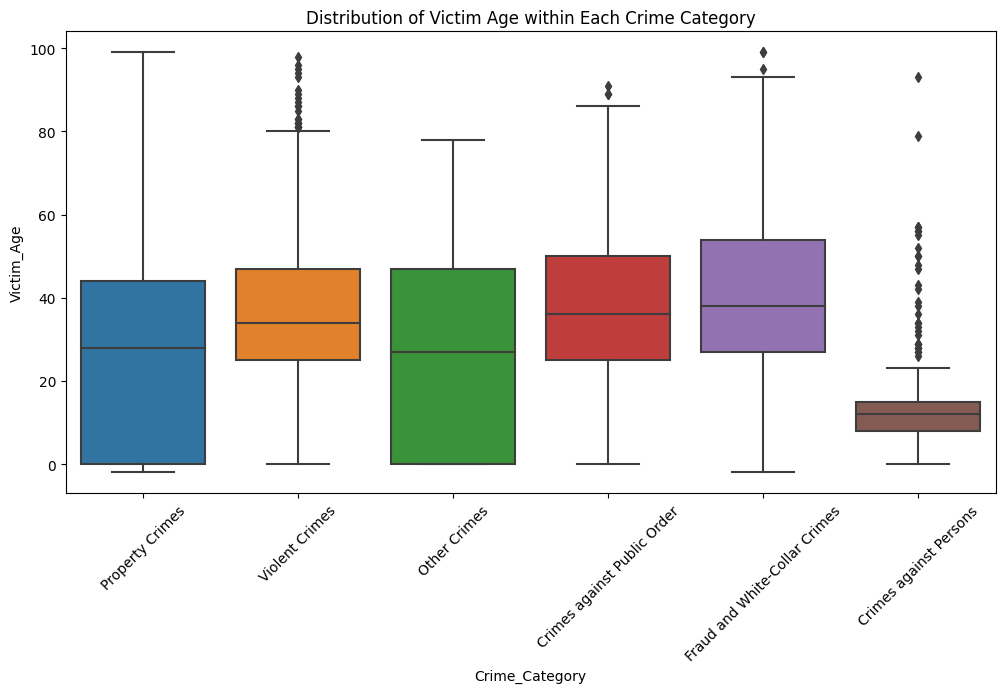

In [12]:
# Plot the distribution of Victim Age within each Crime Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crime_Category', y='Victim_Age', data=train)
plt.title('Distribution of Victim Age within Each Crime Category')
plt.xticks(rotation=45)
plt.show()

> **Observations** 
* There are distinct patterns for Victim_ages against the crimes that were committed.
* Property crimes had Victime ages upto 45 while violent crimes had a range from about 25-45.Other Crimes also had a age range from 0-45,while Crimes against public order and Fraud and White collar crimes had ranges from 25 to about 50.Crimes Against person had a victime_age range between 7 and just under 20.
* Age binning would be a good feature to capture these patterns.


In [13]:
unique_victim_sex = train['Victim_Sex'].unique()
unique_victim_sex

array(['M', 'X', 'F', nan, 'H'], dtype=object)

In [14]:
X = train.drop('Crime_Category', axis=1)
y = train['Crime_Category']

In [15]:
X.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
dtype: int64

# Preprocessing and Feature Engineering

In [16]:

# Create a copy of the geographical coordinates for clustering
# Apply KMeans clustering to geographical coordinates which create clusters based on the locations in the data
X_coords = X[['Latitude', 'Longitude']].copy()
test_coords = test[['Latitude', 'Longitude']].copy()
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)

# Adding 'Cluster' as a new feature in both X and test datasets
X['Cluster'] = kmeans.fit_predict(X_coords)
test['Cluster'] = kmeans.predict(test_coords)

# Handle missing values in 'Modus_Operandi' by replacing NaNs with an empty string and specify 'Modus_operandi as a Text Column for further processing'
X['Modus_Operandi'] = X['Modus_Operandi'].fillna('')
test['Modus_Operandi'] = test['Modus_Operandi'].fillna('')
text_column = 'Modus_Operandi'

# Convert 'Weapon_Used_Code' to string data type to ensure proper handling as a categorical variable
X['Weapon_Used_Code'] = X['Weapon_Used_Code'].astype(str)
test['Weapon_Used_Code'] = test['Weapon_Used_Code'].astype(str)

# Replace placeholders 'H' and 'X' in 'Victim_Sex' with NaN to handle missing or unspecified gender data uniformly
X['Victim_Sex'] = X['Victim_Sex'].replace(['H', 'X'], np.nan)
test['Victim_Sex'] = test['Victim_Sex'].replace(['H', 'X'], np.nan)

# Convert date columns to datetime objects for easier manipulation and feature extraction
X['Date_Reported'] = pd.to_datetime(X['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p')
X['Date_Occurred'] = pd.to_datetime(X['Date_Occurred'], format='%m/%d/%Y %I:%M:%S %p')
test['Date_Reported'] = pd.to_datetime(test['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p')
test['Date_Occurred'] = pd.to_datetime(test['Date_Occurred'], format='%m/%d/%Y %I:%M:%S %p')

# Extract date components (year, month, day) from both 'Date_Reported' and 'Date_Occurred'
for df in [X, test]:
    df['Reported_Year'] = df['Date_Reported'].dt.year
    df['Reported_Month'] = df['Date_Reported'].dt.month
    df['Reported_Day'] = df['Date_Reported'].dt.day
    df['Occurred_Year'] = df['Date_Occurred'].dt.year
    df['Occurred_Month'] = df['Date_Occurred'].dt.month
    df['Occurred_Day'] = df['Date_Occurred'].dt.day

# Handle negative ages by replacing them with the median age of valid (non-negative) ages
median_age = X[X['Victim_Age'] >= 0]['Victim_Age'].median()
X['Victim_Age'] = X['Victim_Age'].apply(lambda x: median_age if x < 0 else x)
median_age_test = test[test['Victim_Age'] >= 0]['Victim_Age'].median()
test['Victim_Age'] = test['Victim_Age'].apply(lambda x: median_age_test if x < 0 else x)

# Bin ages into predefined age ranges to create an 'Age_Bin' feature
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
X['Age_Bin'] = pd.cut(X['Victim_Age'], bins=age_bins, labels=age_labels)
test['Age_Bin'] = pd.cut(test['Victim_Age'], bins=age_bins, labels=age_labels)

# Calculate the difference in days between 'Date_Reported' and 'Date_Occurred'
X['Report_Occur_Diff'] = (X['Date_Reported'] - X['Date_Occurred']).dt.days
test['Report_Occur_Diff'] = (test['Date_Reported'] - test['Date_Occurred']).dt.days

# Drop columns that are no longer needed
X = X.drop(['Date_Reported', 'Date_Occurred', 'Area_ID'], axis=1)
test = test.drop(['Date_Reported', 'Date_Occurred', 'Area_ID'], axis=1)

# Identify categorical and numeric columns for preprocessing
categorical_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(include=[np.number]).columns

# Define preprocessing pipelines for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('meanimputer', SimpleImputer(strategy='mean')),  # Handle missing values by imputing the mean
    ('standardscaler', StandardScaler())             # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('frequentimputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))             # Convert categorical variables to one-hot encoding
])

text_transformer = Pipeline(steps=[
    ('vectorizer', CountVectorizer())  # Convert text data into numerical features using CountVectorizer
])

# Combine the transformers into a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numeric_columns),
    ('categoric', categorical_transformer, [col for col in categorical_columns if col != text_column]),
    ('text', text_transformer, text_column)
])

# Baseline Dummy Classifier Model

In [17]:
'''
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train,Y_train)
dummy_clf.predict(X)
dummy_clf.score(X, Y)
'''

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)\nfrom sklearn.dummy import DummyClassifier\ndummy_clf = DummyClassifier(strategy="most_frequent")\ndummy_clf.fit(X_train,Y_train)\ndummy_clf.predict(X)\ndummy_clf.score(X, Y)\n'

Acccuracy=0.5833

# Logistic Regression with hyperparameter tuning

In [18]:
# Logistic Regression model with hyperparameter tuning
def logistic_regression_model(X_train, y_train):
    # Chose 'liblinear' solver and 2000 iterations based on trial and error.
    logistic_regression = LogisticRegression(max_iter=2000, solver='liblinear')
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),   
        ('classifier', logistic_regression)  
    ])

    #parameter grid to search over different hyperparameter combinations
    param_grid = {
        'classifier__C': [0.1, 1, 10],       # Regularization strength
        'classifier__penalty': ['l1', 'l2']  # Type of regularization
    }

    # GridSearchCV to perform cross-validation and find the best hyperparameters
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search




* Validation accuracy 0.95075
* Best parameters found:  {'classifier__C': 1, 'classifier__penalty': 'l1'}
* Best cross-validation score:  0.9503124999999999

# XGBOOST with Hyperparameter tuning

In [19]:
# XGBoost model with hyperparameter tuning
def xgboost_model(X_train, y_train):
    xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
     # 'logloss' is set as the evaluation metric for the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  
        ('classifier', xgb_classifier)   
    ])

    #parameter grid to search over different hyperparameter combinations
    param_grid = {
        'classifier__n_estimators': [50, 100, 200],     # Number of trees in the XGBoost model
        'classifier__learning_rate': [0.01, 0.1, 0.2],  # Learning rate
        'classifier__max_depth': [3, 4, 5]              # Maximum depth of each tree
    }
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search



* Validation Accuracy: 0.95975
* Best Parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}
* Best Cross-Validation Score: 0.958625

# Random Forest with Hyperparameter tuning

In [20]:

# Random Forest model with hyperparameter tuning
def random_forest_model(X_train, y_train):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),   
        ('classifier', RandomForestClassifier(random_state=7))  
    ])
    
    param_grid = {
        'classifier__n_estimators': [100, 200],           # Number of trees in the forest
        'classifier__max_depth': [None, 10, 20],          # Maximum depth of the tree
        'classifier__min_samples_split': [2, 5],          # Minimum number of samples required to split an internal node
        'classifier__min_samples_leaf': [1, 2],           # Minimum number of samples required to be at a leaf node
        'classifier__max_features': ['sqrt', 'log2'],     # Number of features to consider when looking for the best split
        'classifier__bootstrap': [True, False],           # Whether bootstrap samples are used when building trees
        'classifier__class_weight': [None, 'balanced']    # Class weights
    }
    
    # Use StratifiedKFold to ensure that each fold of the cross-validation has the same proportion of classes as the original dataset
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=0)
    grid_search.fit(X_train, y_train)
    
    print("Best parameters found: ", grid_search.best_params_)
    print("Best cross-validation score: ", grid_search.best_score_)
    return grid_search





* Validation Accuracy: 0.93175
* Best Parameters: {'classifier__bootstrap': False, 'classifier__class_weight': None, 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
* Best Cross-Validation Score: 0.93125

In [21]:
# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

def run_all_models(X_train, X_valid, y_train, y_valid, test):
    models = {
        'Logistic Regression': logistic_regression_model,
        'XGBoost': xgboost_model,
        'Random Forest': random_forest_model
    }
    
    best_model_name = None
    best_accuracy = 0
    best_model = None
    best_params = None
    best_cross_val_score = None
    model_accuracies = {}

    for name, model_func in models.items():
        print(f"Training {name}...")
        grid_search = model_func(X_train, y_train)
        y_valid_pred = grid_search.predict(X_valid)
        accuracy = accuracy_score(y_valid, y_valid_pred)
        model_accuracies[name] = accuracy
        
        print(f"\n{name} Validation Accuracy: {accuracy}")
        print(f"{name} Classification Report:")
        print(classification_report(y_valid, y_valid_pred))
        print(f"{name} Confusion Matrix:")
        print(confusion_matrix(y_valid, y_valid_pred))
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_name = name
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_
            best_cross_val_score = grid_search.best_score_

    print("\nModel Accuracies:")
    for model_name, accuracy in model_accuracies.items():
        print(f"{model_name}: {accuracy}")

    print(f"\nBest model is {best_model_name} with validation accuracy {best_accuracy}")
    print("Best parameters found: ", best_params)
    print("Best cross-validation score: ", best_cross_val_score)

    # Predict on the test set using the best model
    Y_test_pred = best_model.predict(test)
    Y_test_pred = label_encoder.inverse_transform(Y_test_pred)
    
    # Prepare the submission
    submission = pd.DataFrame({
        "ID": np.arange(1, len(Y_test_pred) + 1),
        "Crime_Category": Y_test_pred
    })
    submission.to_csv('submission.csv', index=False)
    return submission

# Now you can call the function
submission = run_all_models(X_train, X_valid, y_train, y_valid, test)

Training Logistic Regression...

Logistic Regression Validation Accuracy: 0.9505
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.58      0.65        45
           1       0.83      0.85      0.84       362
           2       0.96      0.93      0.95       271
           3       0.60      0.25      0.35        36
           4       0.98      0.98      0.98      2333
           5       0.93      0.95      0.94       953

    accuracy                           0.95      4000
   macro avg       0.84      0.76      0.79      4000
weighted avg       0.95      0.95      0.95      4000

Logistic Regression Confusion Matrix:
[[  26    4    1    0    0   14]
 [   3  309    7    5   11   27]
 [   0   13  252    1    5    0]
 [   1   21    2    9    2    1]
 [   0    6    0    0 2296   31]
 [   5   19    0    0   19  910]]
Training XGBoost...

XGBoost Validation Accuracy: 0.96075
XGBoost Classification Report:
       

# **Summary and Inferences**
**XGBoost** has the highest validation accuracy and best cross-validation score,indicating that the model generalizes well and is useful when the primary goal is maximizing accuracy.

**Logistic Regression** can be a good alternaive when a simpler model is required without a significant drop in the accuracy.

**Random Forest** does not match the accuracy of the other two models, likely due to overfitting or not capturing the underlying data distribution as effectively as XGBoost.
